<a href="https://colab.research.google.com/github/dolmani38/drift/blob/main/laos_project_1115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Concept drift로 인한 모델 성능 저하의 정량적 추정 방법 (2) <br>

Quantitative performance estimation method for model performance degradation due to concept drift

## Laos project!!!

# 1. Abstract

* 기계학습을 통해 학습된 모델은 업무 활용 시 그 성능을 실측하기 매우 어렵다 . 때문에 운영 부서에서는 모델의 성능을 효과적으로 관리하지 못한다. 이로 인해 모델의 상태를 판단하기 위한 Concept drift 탐지 방법이 다양하게 연구되고 있다 .
* 운영 부서에서는 운영 중인 모델의 성능을 정량적으로 관리하려고 한다 . 그러나 Concept drift 는 모델 상태를 데이터 관계적으로 판단 할 뿐 , 모델의 정량적 성능 수치를 추정하지는 못 한다.
* 본 연구에서는 Concept drift 의 통계량을 통해 정량적으로 precision 값을 추정하
는 성능 예측 모델을 제안한다.
* 제안 모델은 정답 라벨을 포함하는 테스트데이터셋에서 정답을 맞춘 데이터와 틀린데이터의 비율을 임의 조정한 샘플데이터셋을 복수 생성하고 각 데이터셋의 Drift 통계량과 성능의 관계를 학습한다. 이후 실제 유입되는 데이터셋의 Drift 통계량을 측정하고 이를 제안 모델에 대입하여 성능을 추정한다.
* Drift 를 임의 주입한 가상데이터셋을 통해 학습한 가상 비즈니스 모델에 적용하여 제안 모델의 적합성을 확인하고 현실 비즈니스에서 사용될 수 있는 대출 심사 모델과 신용카드 오사용 탐지 모델 을 통해 제안 모델의 성능 예측 유효성을 확인한다.












# 3. Proposed Method

## 개념도

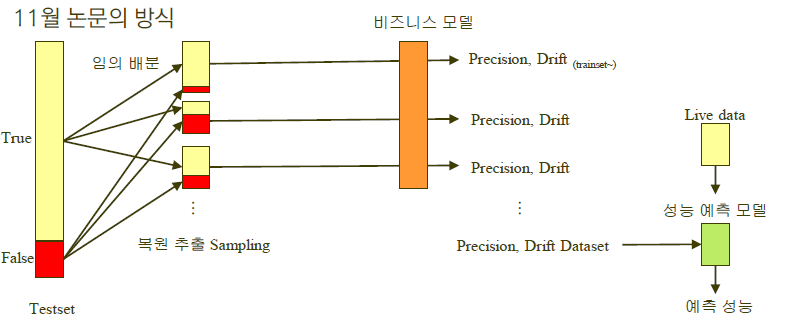

## pseudo code

--------------------------------------------------------------------------------
**Step1 : performance modeling**

--------------------------------------------------------------------------------
&nbsp;&nbsp;1:&nbsp;&nbsp;$L_{trainset} =  \{ Y_L, X_L\} $ #이하 간략히 $L$ 로 표기 <br>

&nbsp;&nbsp;2:&nbsp;&nbsp;$L_{testset} =  \{ Y_T, X_T\} $<br>
&nbsp;&nbsp;3:&nbsp;&nbsp;$f(x,L) = train(Y_L, X_L)$ <br>
&nbsp;&nbsp;4:&nbsp;&nbsp;$base\_score = score(f(X_T,L),Y_T)$<br>
&nbsp;&nbsp;5:&nbsp;&nbsp;$For$ number_of_sample $do $<br>
&nbsp;&nbsp;6:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $α = random\_gaussian(mean=base\_score,std=sample\_scale)$<br>
&nbsp;&nbsp;7:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $if \  α > base\_score$<br>
&nbsp;&nbsp;8:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $α = 2 base\_score - α$<br>
&nbsp;&nbsp;9:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $end$<br>
&nbsp;&nbsp;10:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$Y_{s(true)}, X_{s(true)} = random\_sampling(L_{testset(true)}, size=α*count(L_{testset(false)}) / (1-α))$<br>
&nbsp;&nbsp;11:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$Y_{s(false)}, X_{s(false)} = L_{testset(false)}$<br>
&nbsp;&nbsp;12:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$Y_s, X_s = shuffle(Y_{s(true)},Y_{s(false)}, X_{s(true)},X_{s(false)})$<br>

&nbsp;&nbsp;13:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$drift\_array \leftarrow KS\_Test(X_L, X_s)$<br>
&nbsp;&nbsp;14:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$score\_array \leftarrow score(f(X_s,L),Y_s))$<br>
&nbsp;&nbsp;15:&nbsp;&nbsp;$end$ <br>
&nbsp;&nbsp;16:&nbsp;&nbsp;$ppm(drift) = train(score\_array, drift\_array)$

--------------------------------------------------------------------------------
**Step2 : apply perfomance_model**

--------------------------------------------------------------------------------

1:&nbsp;&nbsp;$l_{Input\_live\_data} =\{ X_l\}$ # live data에는 Y가 존재하지 않는다.<br>
2:&nbsp;&nbsp;$drift = KS\_Test(X_L, X_l)$ <br>
3:&nbsp;&nbsp;$score_{predicted} = ppm(drift)$

## 설명

성능 예측 대상의 모델을 $f(x,L)$이라 할 때,

trainset과 testset은 $f(x,L)$의 학습 및 성능 측정을 위해 활용된 데이터에 해당.<br>
testset을 통하여 $f(x,L)$의 성능, base_score이 측정되었다.

<b>Step1 : 성능 모델링 단계</b> <br>
1. mean=base_score, std=sample_scale 으로 gaussian 확률값, α을 random 하게 취한다.
2. mean=base_score 이므로, base_score의 우측 α값이 취득된 경우, α=2base_score−α 으로 보정한다.
3. 이는 gaussian 분포의 우측을 접어서 좌측만 남겨놓은 것과 같다.
4. $L_{testset}$ 중 모델 $f(x,L)$에 의해 Y 맞춘 set을 $L_{testset(true)}$, 틀린 set을 $L_{testset(false)}$ 라 한다면, 
5. $L_{testset(true)}$ 에서 $α∗count(L_{testset(false)})/(1−α)$ 개수 만큼, 임의 추출한다.
6. $L_{testset(true)}$ 에 $L_{testset(false)}$ 을 혼합한 Sample dataset, $Y_s,X_s$ 을 만든다. 
7. $Y_s,X_s$를 모델 $f(x,L)$에 대입하면, 취득한 gaussian 확률값 α에 해당하는 precision을 갖는다. 
8. trainset $X_L$ 대비, $X_s$의 KS_Test 통계량(drift)을 취득하여 drift_array에 저장한다.
9. $Y_s,X_s$를 모델 $f(x,L)$에 대입하여 취득한 precision을 score_array에 저장한다.
10. 주어진 회수 만큼 반복하여 score,drift pair의 dataset을 구성한다.
11. 위의 dataset을 학습하여 성능예측모델(ppm)을 학습한다.

<b>Step2 : $ppm(drift)$의 적용 단계</b><br>
1. 일정기간 축적한 실 dataset ($X_l$)를 취득한다.
2. trainset($X_L$)과 실 dataset ($X_l$)에 대해 Kolmogorov–Smirnov test를 하여, drift통계량을 취득한다.
3. $ppm(drift)$을 통해 예측 precision을 구한다.


# 4. 실험 계획

*   Data
1. Synthatic Data
> Drift가 유도된 가상의 생성 데이터 사용<BR>
> 100,000건, 10개의 feature, 0/1의 Y <BR>
>> trainset : 10,000건 <br>
>> testset : 4,000건 <br>
>> online dataset : 86,000건 <br>

2. Credit Card Transaction Data
> This data has more than 20 million transactions generated from a multi-agent virtual world simulation performed by IBM. The data covers 2000 (synthetic) consumers resident in the United States, but who travel the world. The data also covers decades of purchases, and includes multiple cards from many of the consumers.
>> trainset : 54,786건 (2005 - 2007년, 1/30 축소) <br>
>> testset : 13,697건 <br>
>> online dataset : 90,836건 (2008 - 2009년, 1/30 축소)<br>

3. Personal Loan Data
> 미국의 개인 대출 기업 ‘Lending Club’의 공개 데이터 사용<BR>
> 2007~2017년까지 총 2,260,701건의 데이터, 대출 건당 실제 ‘default’ 여부 포함
151개 Column<BR>
> 데이터 정제 후, 81개 Features, 120만건 사용<BR>
>> trainset : 8,047건 (2010년)<BR>
>> testset : 3,450건 (2010년) <br>
>> online dataset : 1,268,183건 (2011~2017년)<BR>

* 예측 알고리즘
> Random-forest for Synthatic Data and Personal Loan Data <BR>
> Catboost for Credit Card Transaction Data

* 성능 예측 알고리즘
> Ordinary Least Squares regression

* 실험의 변수
> Sampling_scale<BR>

* 측정 지표
> 비즈니스 예측 모델의 성능 지표 : precision<BR>
> 성능 예측 모델의 성능 지표 : R_square<br>


# 5. 실험 결과

5.1 Synthatic Data 실험 결과

https://github.com/dolmani38/drift/blob/main/synthetic_data_generation_1113.ipynb



* online data의 precision 변화 <br>
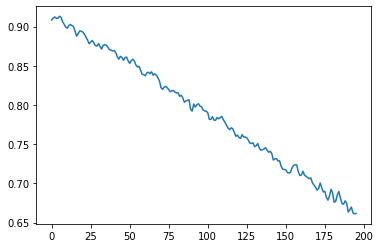

* 상기 조건에서 drift의 변화 (각 시점의 10개 feature drift 통계량의 합) <br>
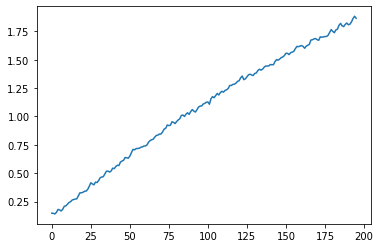

| 실험   | Sample scale | $R^2$ |
|----- | -------| ------|
| 1 | 0.50 | -1.8689 |
| 2 | 0.75 | -0.6562 |
| 3 | 1.00 | 0.5913 |
| 4 | 1.25 | 0.9752 |
| 5 | 1.50 | 0.8772 |
| 6 | 1.75 | 0.0535 |
| 7 | 2.00 | -1.3686 |



sample scale (sample dataset의 성능을 gaussian 분포에 의해 취득할 때, standard deviation에 해당하는 값)이 1.25일때 $R^2$의 최대값. 즉, 최대의 성능 예측 성능을 나타내었다.

* sample scale = 1.25 일때의 sample의 성능 분포 <br>
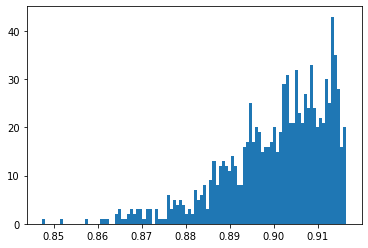

testset에 의해 측정한 base precision의 값, 0.9162 을 기준으로 약 0.84 대역까지 gaussian 분포에 의해 성능 분포된 sample이 취득되었다.

* sample scale = 1.25에서의 성능 예측 결과 <br>
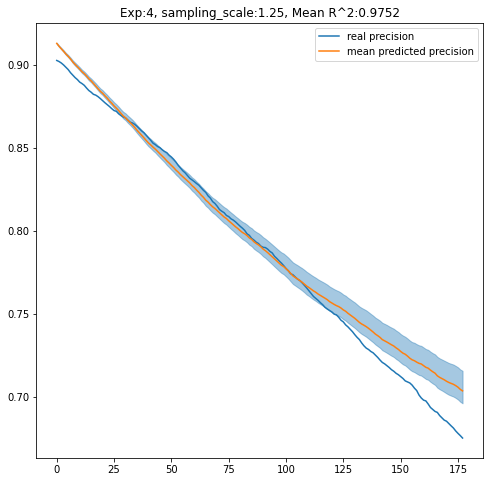

synthatic data 로서, 상당히 높은 예측 결과를 얻을 수 있었다.

5.2 Credit Card Transaction Data 실험 결과

| 실험   | Sample scale | $R^2$ |
|----- | -------| ------|
| 1 | 0.50 | -0.9837 |
| 2 | 1.00 | 0.1144 |
| 3 | 1.50 | 0.4562 |
| 4 | 2.00 | 0.1237 |
| 5 | 2.50 | -0.2985 |
| 6 | 3.00 | 0.1781 |
| 7 | 3.50 | 0.2693 |
| 8 | 4.00 | 0.2059 |

sample scale (sample dataset의 성능을 gaussian 분포에 의해 취득할 때, standard deviation에 해당하는 값)이 1.50일때 $R^2$의 최대값. 즉, 최대의 성능 예측 성능을 나타내었다.

* sample scale = 1.50 일때의 sample의 성능 분포 <br>



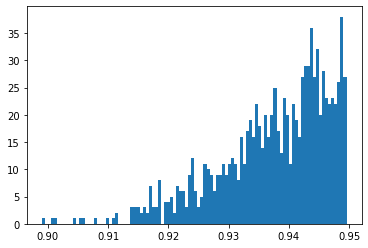

testset에 의해 측정한 base precision의 값, 0.9495 을 기준으로 약 0.90 대역까지 gaussian 분포에 의해 성능 분포된 sample이 취득되었다.

* sample scale = 1.50에서의 성능 예측 결과

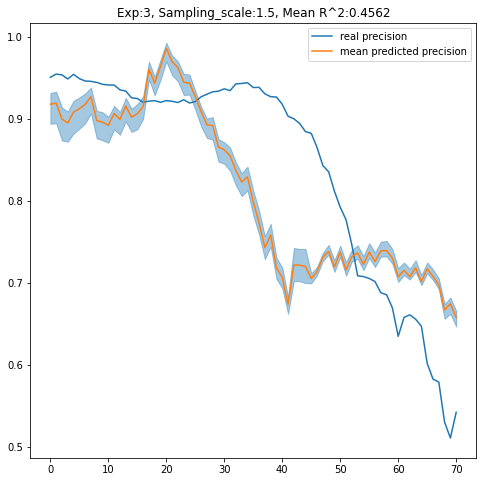

5.3 Personal Loan Data

| 실험   | Sample scale | $R^2$ |
|----- | -------| ------|
| 1 | 0.50 | -1.7755 |
| 2 | 1.00 | -0.1743 |
| 3 | 1.50 | 0.2778 |
| 4 | 2.00 | 0.5183 |
| 5 | 2.50 | 0.4748 |
| 6 | 3.00 | 0.2417 |
| 7 | 3.50 | 0.0426 |
| 8 | 4.00 | -0.0924 |

sample scale (sample dataset의 성능을 gaussian 분포에 의해 취득할 때, standard deviation에 해당하는 값)이 2.00일때  R2 의 최대값. 즉, 최대의 성능 예측 성능을 나타내었다.

* sample scale = 2.00 일때의 sample의 성능 분포

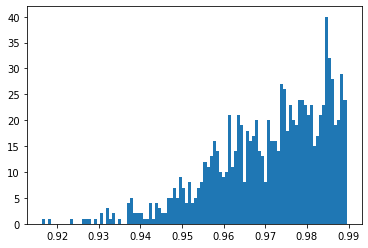

testset에 의해 측정한 base precision의 값, 0.9908 을 기준으로 약 0.92 대역까지 gaussian 분포에 의해 성능 분포된 sample이 취득되었다.


* sample scale = 1.50에서의 성능 예측 결과

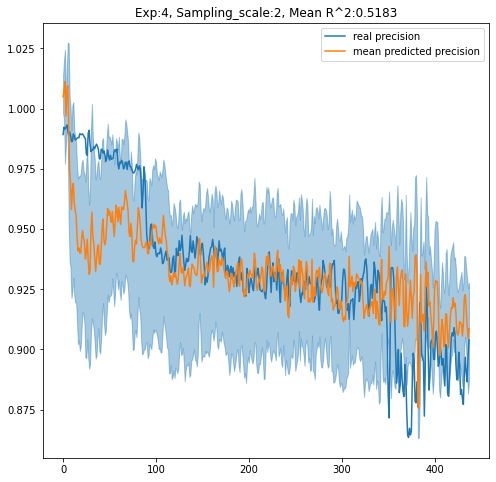

$R^2$ = 0.51의 결과를 얻었지만, 복수의 실험에서 발생되는 오차의 범위는 상대적으로 높았다. (상기 그림에서 하늘색 영역)